# Questão 7


### Professor: Fernando Von Zuben
### Aluno: Marcelo Eduardo Pederiva

# Questão 7a)

In [1]:
import keras

mnist = keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train, x_test = x_train / 255.0, x_test / 255.0

Using TensorFlow backend.


In [2]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3),
 activation='relu',input_shape=(28, 28, 1)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation='softmax'))

model.get_config()

model.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)
evaluation = model.evaluate(x_test, y_test)

model.save('mnist_model.h5')

Epoch 1/5
60000/60000 [==============================] - 14s 230us/step - loss: 0.1938 - acc: 0.9406
Epoch 2/5
60000/60000 [==============================] - 11s 185us/step - loss: 0.0788 - acc: 0.9757
Epoch 3/5
60000/60000 [==============================] - 11s 185us/step - loss: 0.0603 - acc: 0.9821
Epoch 4/5
60000/60000 [==============================] - 11s 184us/step - loss: 0.0517 - acc: 0.9847
Epoch 5/5
10000/10000 [==============================] - 1s 61us/step


# Searching for the index of the same class

In [3]:
idx = 0
k = [1,7,8]
sv=[]
num = {}

for ki in k:
    for j in y_test:
        if j == ki:
            sv.append(idx)
        idx+=1
    num[ki] = sv
    sv = []
    idx = 0
    
print('Posição das 10 primeiras posições do Número 3:',num[1][:10])    
print('Posição das 10 primeiras posições do Número 5:',num[7][:10])    
print('Posição das 10 primeiras posições do Número 8:',num[8][:10])

Posição das 10 primeiras posições do Número 3: [2, 5, 14, 29, 31, 37, 39, 40, 46, 57]
Posição das 10 primeiras posições do Número 5: [0, 17, 26, 34, 36, 41, 60, 64, 70, 75]
Posição das 10 primeiras posições do Número 8: [61, 84, 110, 128, 134, 146, 177, 179, 181, 184]


## Escolha de 6 posições aleatórias de cada numero

In [4]:
import random

k = [1,7,8]
choice = {}
val = []
for ki in k:
    for i in range(2):
        val.append(random.choice(num[ki]))
#     print(val)
    choice[ki] = val
    val =[]
print(choice)
# print(choice[5])
# print(choice[8])

{1: [7928, 1766], 7: [1206, 3425], 8: [1740, 2246]}


In [5]:
p =[]
for i in k:
    p.append(choice[i][0])
    p.append(choice[i][1])
print(p)

[7928, 1766, 1206, 3425, 1740, 2246]


In [6]:
h =[]
for ki in k:
    for j in choice[ki]:
        h.append(max(model.predict_proba(x_test[j].reshape(1,28,28,1))[0]))
        ynew = model.predict_classes(x_test[j].reshape(1,28,28,1))
        print('Predição: %i'    %ynew )
        print('Verdadeiro Valor: %i \n'%ki)
print(h)

Predição: 1
Verdadeiro Valor: 1 

Predição: 1
Verdadeiro Valor: 1 

Predição: 7
Verdadeiro Valor: 7 

Predição: 7
Verdadeiro Valor: 7 

Predição: 8
Verdadeiro Valor: 8 

Predição: 8
Verdadeiro Valor: 8 

[0.99998283, 0.9999999, 0.99725455, 0.9952786, 0.99999905, 0.99996305]


In [7]:
import keras
import innvestigate
import matplotlib.pyplot as plt
%matplotlib inline
mnist = keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train, x_test = x_train / 255.0, x_test / 255.0

model = keras.models.load_model('mnist_model.h5')
model_wo_sm = innvestigate.utils.keras.graph.model_wo_softmax(model)

imgs =[]
anlsg= []
anlss= []
anlsd= []
anlse= []
anlsa= []
anlsz= []

for i in choice[1]:
    imagem = x_test[i:i+1]
    imgs.append(imagem)
    
#     analyzer_g = innvestigate.analyzer.gradient_based.Gradient(model=model_wo_sm)
    analyzer_g = innvestigate.analyzer.Gradient(model=model_wo_sm)
    analysis_g = analyzer_g.analyze(imagem)
    anlsg.append(analysis_g)
    
#     analyzer_s = innvestigate.analyzer.gradient_based.SmoothGrad(model=model_wo_sm)
    analyzer_s = innvestigate.analyzer.SmoothGrad(model=model_wo_sm)
    analysis_s = analyzer_s.analyze(imagem)
    anlss.append(analysis_s)
    
#     analyzer_d = innvestigate.analyzer.deeptaylor.DeepTaylor(model=model_wo_sm)
    analyzer_d = innvestigate.analyzer.DeepTaylor(model=model_wo_sm)
    analysis_d = analyzer_d.analyze(imagem)
    anlsd.append(analysis_d)
    
    
    analyzer_e = innvestigate.analyzer.LRPEpsilon(model=model_wo_sm, epsilon=1)
    analysis_e = analyzer_e.analyze(imagem)
    anlse.append(analysis_e)
    
    analyzer_a = innvestigate.analyzer.LRPAlphaBeta(model=model_wo_sm,alpha=1.5)
    analysis_a = analyzer_a.analyze(imagem)
    anlsa.append(analysis_a)
    
    analyzer_z = innvestigate.analyzer.LRPZ(model=model_wo_sm)
    analysis_z = analyzer_z.analyze(imagem)
    anlsz.append(analysis_z)
    
for i in choice[7]:
    imagem = x_test[i:i+1]
    imgs.append(imagem)
    
    #     analyzer_g = innvestigate.analyzer.gradient_based.Gradient(model=model_wo_sm)
    analyzer_g = innvestigate.analyzer.Gradient(model=model_wo_sm)
    analysis_g = analyzer_g.analyze(imagem)
    anlsg.append(analysis_g)
    
#     analyzer_s = innvestigate.analyzer.gradient_based.SmoothGrad(model=model_wo_sm)
    analyzer_s = innvestigate.analyzer.SmoothGrad(model=model_wo_sm)
    analysis_s = analyzer_s.analyze(imagem)
    anlss.append(analysis_s)
    
#     analyzer_d = innvestigate.analyzer.deeptaylor.DeepTaylor(model=model_wo_sm)
    analyzer_d = innvestigate.analyzer.DeepTaylor(model=model_wo_sm)
    analysis_d = analyzer_d.analyze(imagem)
    anlsd.append(analysis_d)
    
    
    analyzer_e = innvestigate.analyzer.LRPEpsilon(model=model_wo_sm, epsilon=1)
    analysis_e = analyzer_e.analyze(imagem)
    anlse.append(analysis_e)
    
    analyzer_a = innvestigate.analyzer.LRPAlphaBeta(model=model_wo_sm,alpha=1.5)
    analysis_a = analyzer_a.analyze(imagem)
    anlsa.append(analysis_a)
    
    analyzer_z = innvestigate.analyzer.LRPZ(model=model_wo_sm)
    analysis_z = analyzer_z.analyze(imagem)
    anlsz.append(analysis_z)
    
for i in choice[8]:
    imagem = x_test[i:i+1]
    imgs.append(imagem)
    
    #     analyzer_g = innvestigate.analyzer.gradient_based.Gradient(model=model_wo_sm)
    analyzer_g = innvestigate.analyzer.Gradient(model=model_wo_sm)
    analysis_g = analyzer_g.analyze(imagem)
    anlsg.append(analysis_g)
    
#     analyzer_s = innvestigate.analyzer.gradient_based.SmoothGrad(model=model_wo_sm)
    analyzer_s = innvestigate.analyzer.SmoothGrad(model=model_wo_sm)
    analysis_s = analyzer_s.analyze(imagem)
    anlss.append(analysis_s)
    
#     analyzer_d = innvestigate.analyzer.deeptaylor.DeepTaylor(model=model_wo_sm)
    analyzer_d = innvestigate.analyzer.DeepTaylor(model=model_wo_sm)
    analysis_d = analyzer_d.analyze(imagem)
    anlsd.append(analysis_d)
    
    
    analyzer_e = innvestigate.analyzer.LRPEpsilon(model=model_wo_sm, epsilon=1)
    analysis_e = analyzer_e.analyze(imagem)
    anlse.append(analysis_e)
    
    analyzer_a = innvestigate.analyzer.LRPAlphaBeta(model=model_wo_sm,alpha=1.5)
    analysis_a = analyzer_a.analyze(imagem)
    anlsa.append(analysis_a)
    
    analyzer_z = innvestigate.analyzer.LRPZ(model=model_wo_sm)
    analysis_z = analyzer_z.analyze(imagem)
    anlsz.append(analysis_z)

Text(0.5, 1.0, 'LRPZ')

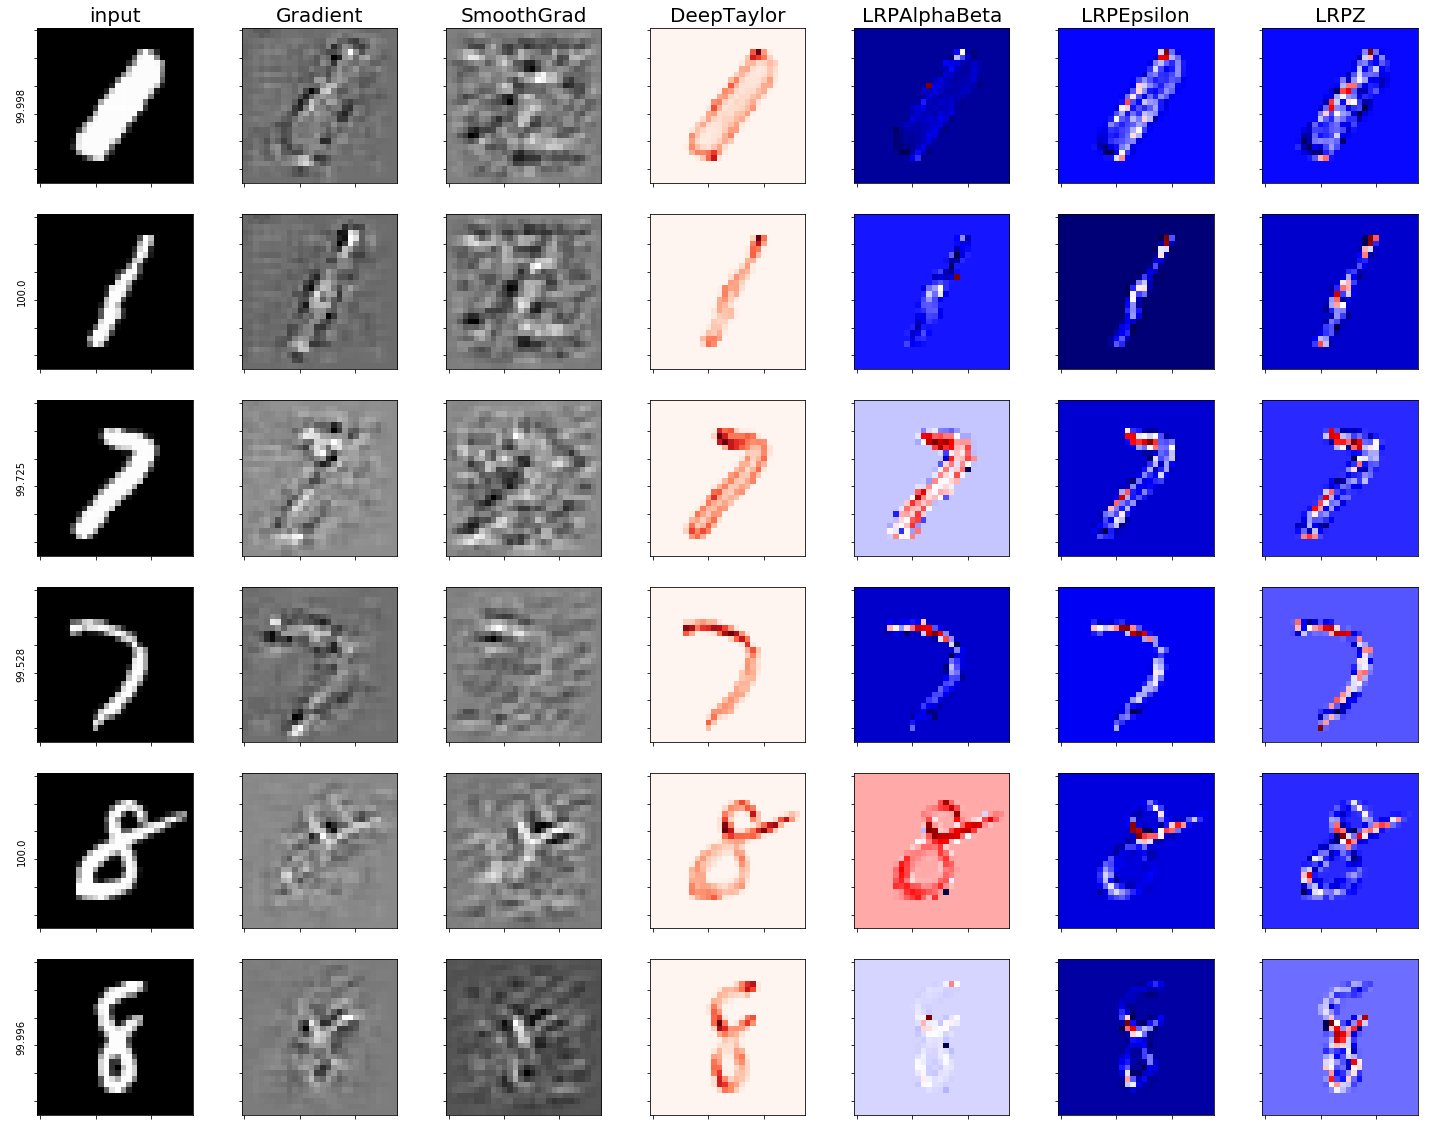

In [8]:
import numpy as np
fig = plt.figure(figsize=(25, 20))
plt.axis('off')
plt.grid(b=None)

ax = []
rows = 6
columns = 7
j = 0


for i in range(0,columns*rows,7):
    
    ax.append( fig.add_subplot(rows, columns, i+1) )
    plt.imshow(imgs[j].squeeze(), cmap='gray', interpolation='nearest')
    ax[i].set_yticklabels([])
    ax[i].set_xticklabels([])
    
    ax.append( fig.add_subplot(rows, columns, i +2) )
    plt.imshow(anlsg[j].squeeze(), cmap='gray', interpolation='nearest')
    ax[i+1].set_yticklabels([])
    ax[i+1].set_xticklabels([])
    
    ax.append( fig.add_subplot(rows, columns, i +3) )
    plt.imshow(anlss[j].squeeze(), cmap='gray', interpolation='nearest')
    ax[i+2].set_yticklabels([])
    ax[i+2].set_xticklabels([])
    
    ax.append( fig.add_subplot(rows, columns, i +4) )
    plt.imshow(anlsd[j].squeeze(), cmap='Reds', interpolation='nearest')
    ax[i+3].set_yticklabels([])
    ax[i+3].set_xticklabels([])
    
    ax.append( fig.add_subplot(rows, columns, i +5) )
    plt.imshow(anlsa[j].squeeze(), cmap='seismic', interpolation='nearest')
    ax[i+4].set_yticklabels([])
    ax[i+4].set_xticklabels([])
    
    ax.append( fig.add_subplot(rows, columns, i +6) )
    plt.imshow(anlse[j].squeeze(), cmap='seismic', interpolation='nearest')
    ax[i+5].set_yticklabels([])
    ax[i+5].set_xticklabels([])
    
    ax.append( fig.add_subplot(rows, columns, i +7) )
    plt.imshow(anlsz[j].squeeze(), cmap='seismic', interpolation='nearest')
    ax[i+6].set_yticklabels([])
    ax[i+6].set_xticklabels([])
    
    j+=1

plt.setp(ax[0*7], ylabel=(np.round(h[0]*100,3)))
plt.setp(ax[1*7], ylabel=(np.round(h[1]*100,3)))
plt.setp(ax[2*7], ylabel=(np.round(h[2]*100,3)))
plt.setp(ax[3*7], ylabel=(np.round(h[3]*100,3)))
plt.setp(ax[4*7], ylabel=(np.round(h[4]*100,3)))
plt.setp(ax[5*7], ylabel=(np.round(h[5]*100,3)))


ax[0].set_title('input', fontsize=20)
ax[1].set_title('Gradient', fontsize=20)
ax[2].set_title('SmoothGrad', fontsize=20)
ax[3].set_title('DeepTaylor', fontsize=20)
ax[4].set_title('LRPAlphaBeta', fontsize=20)
ax[5].set_title('LRPEpsilon', fontsize=20)
ax[6].set_title('LRPZ', fontsize=20)

## Análisando os resultados obtidos da Questão 7a)
No eixo y das imagens de entrada está a porcentagem de confiança da predição feita.

Após tentar definir um peso generalizado do LRPAlpha e LRPEpsilon. Podemos observar que cada um dos mapas resultaram numa representação diferente da caracteristica mais importante para cada número.

O Gradient e SmoothGradient destacaram a influência do contorno dos numeros na predição. Já os métodos seguintes os mapas demonstram os pixeis em vermelhos como mais relevante para a previsão e os pixeis azul como menos relevante.

Nessa atividade decidi optar por observar o numero 1 e 7, pois são digitos faceis de se confundir, dependendo do modo de escrita.

Entre os métodos, podemos observar a relevancia para a caracteristica do traço horizontal ao "desenhar" o numero 7, fator ponderante para diferenciar do 1 acima, o qual não possui essa caracteristica.

Para o terceiro número, optei por analisar o 8. Observamos que nos dois casos, o encontro dos dois circulos do 8 resultaram como a maior caracteristica para a maquina categorizá-lo de forma correta.


# Questão 7b)

Iteration: 1, named_losses: [('ActivationMax Loss', 0.5300568)], overall loss: 0.5300567746162415
Iteration: 2, named_losses: [('ActivationMax Loss', 37.644714)], overall loss: 37.64471435546875
Iteration: 3, named_losses: [('ActivationMax Loss', -227.89272)], overall loss: -227.89271545410156
Iteration: 4, named_losses: [('ActivationMax Loss', -619.75183)], overall loss: -619.7518310546875
Iteration: 5, named_losses: [('ActivationMax Loss', -964.65576)], overall loss: -964.65576171875
Iteration: 6, named_losses: [('ActivationMax Loss', -1279.7773)], overall loss: -1279.77734375
Iteration: 7, named_losses: [('ActivationMax Loss', -1573.3207)], overall loss: -1573.3206787109375
Iteration: 8, named_losses: [('ActivationMax Loss', -1844.4817)], overall loss: -1844.481689453125
Iteration: 9, named_losses: [('ActivationMax Loss', -2109.5408)], overall loss: -2109.540771484375
Iteration: 10, named_losses: [('ActivationMax Loss', -2352.7444)], overall loss: -2352.744384765625
Iteration: 11, n

Iteration: 108, named_losses: [('ActivationMax Loss', -17462.162)], overall loss: -17462.162109375
Iteration: 109, named_losses: [('ActivationMax Loss', -17608.33)], overall loss: -17608.330078125
Iteration: 110, named_losses: [('ActivationMax Loss', -17749.92)], overall loss: -17749.919921875
Iteration: 111, named_losses: [('ActivationMax Loss', -17894.658)], overall loss: -17894.658203125
Iteration: 112, named_losses: [('ActivationMax Loss', -18039.537)], overall loss: -18039.537109375
Iteration: 113, named_losses: [('ActivationMax Loss', -18178.979)], overall loss: -18178.978515625
Iteration: 114, named_losses: [('ActivationMax Loss', -18313.584)], overall loss: -18313.583984375
Iteration: 115, named_losses: [('ActivationMax Loss', -18462.236)], overall loss: -18462.236328125
Iteration: 116, named_losses: [('ActivationMax Loss', -18605.66)], overall loss: -18605.66015625
Iteration: 117, named_losses: [('ActivationMax Loss', -18750.361)], overall loss: -18750.361328125
Iteration: 118

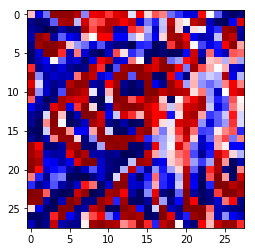

In [9]:
import keras
from vis.visualization import visualize_activation
from vis.utils import utils
import matplotlib.pyplot as plt
%matplotlib inline

model = keras.models.load_model('mnist_model.h5')
layer_idx = utils.find_layer_idx(model, 'dense_2')
model.layers[layer_idx].activation = keras.activations.linear
model = utils.apply_modifications(model)


filter_idx = 9
img = visualize_activation(model, layer_idx, filter_indices=filter_idx,
                           tv_weight=0., lp_norm_weight=0.,
                           input_range=(0., 1.), verbose=True)
plt.imshow(img.squeeze(), cmap='seismic', interpolation='nearest')
plt.show()

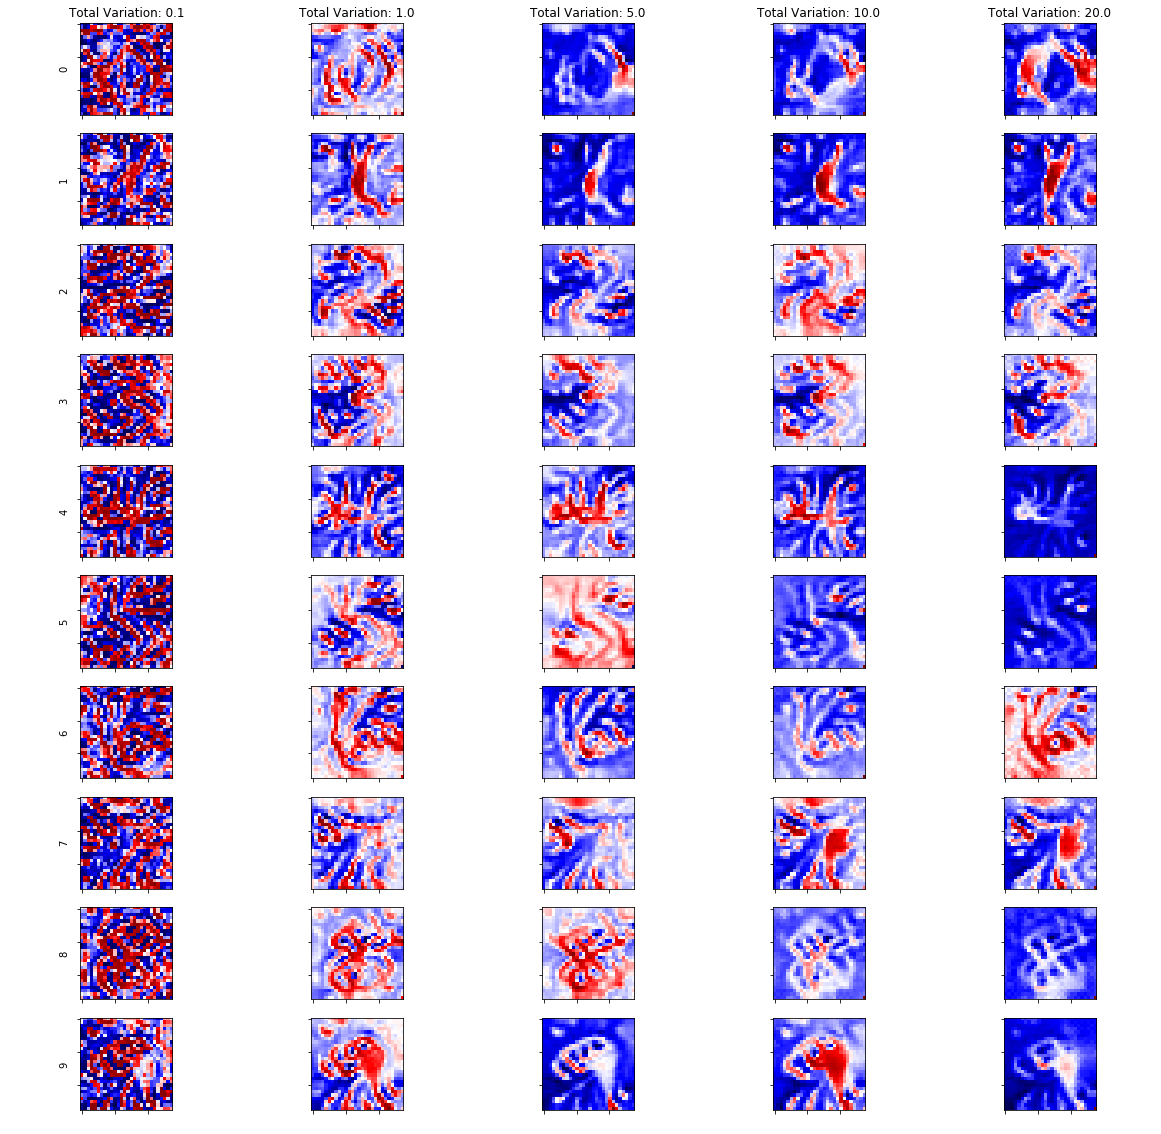

In [10]:
fig = plt.figure(figsize=(20, 20))
plt.grid(b=None)
plt.axis('off')
ax = []
tv = [0.1, 1, 5, 10, 20]
j=0
for idx in range(10):
    for tv_i in range(len(tv)):
        ax.append( fig.add_subplot(10, 5, j+1) )
        img = visualize_activation(model, layer_idx, filter_indices=idx, input_range=(0., 1.), 
                                   tv_weight=tv[tv_i], lp_norm_weight=0.)
        plt.imshow(img.squeeze(), cmap='seismic', interpolation='nearest')
        ax[tv_i].set_title('Total Variation: %.1f'%tv[tv_i])
        ax[j].set_yticklabels([])
        ax[j].set_xticklabels([])
        j+=1
    plt.setp(ax[idx*5], ylabel=idx)

Dentre os valores dos pesos, o Total Variation = 10 teve um resultado com um bom contraste sem deixar a imagem muito pixelada ( Ex: Tv = 0.1) e com uma representação melhor do numero

Continuando, vamos avaliar os pesos do L-p Norm

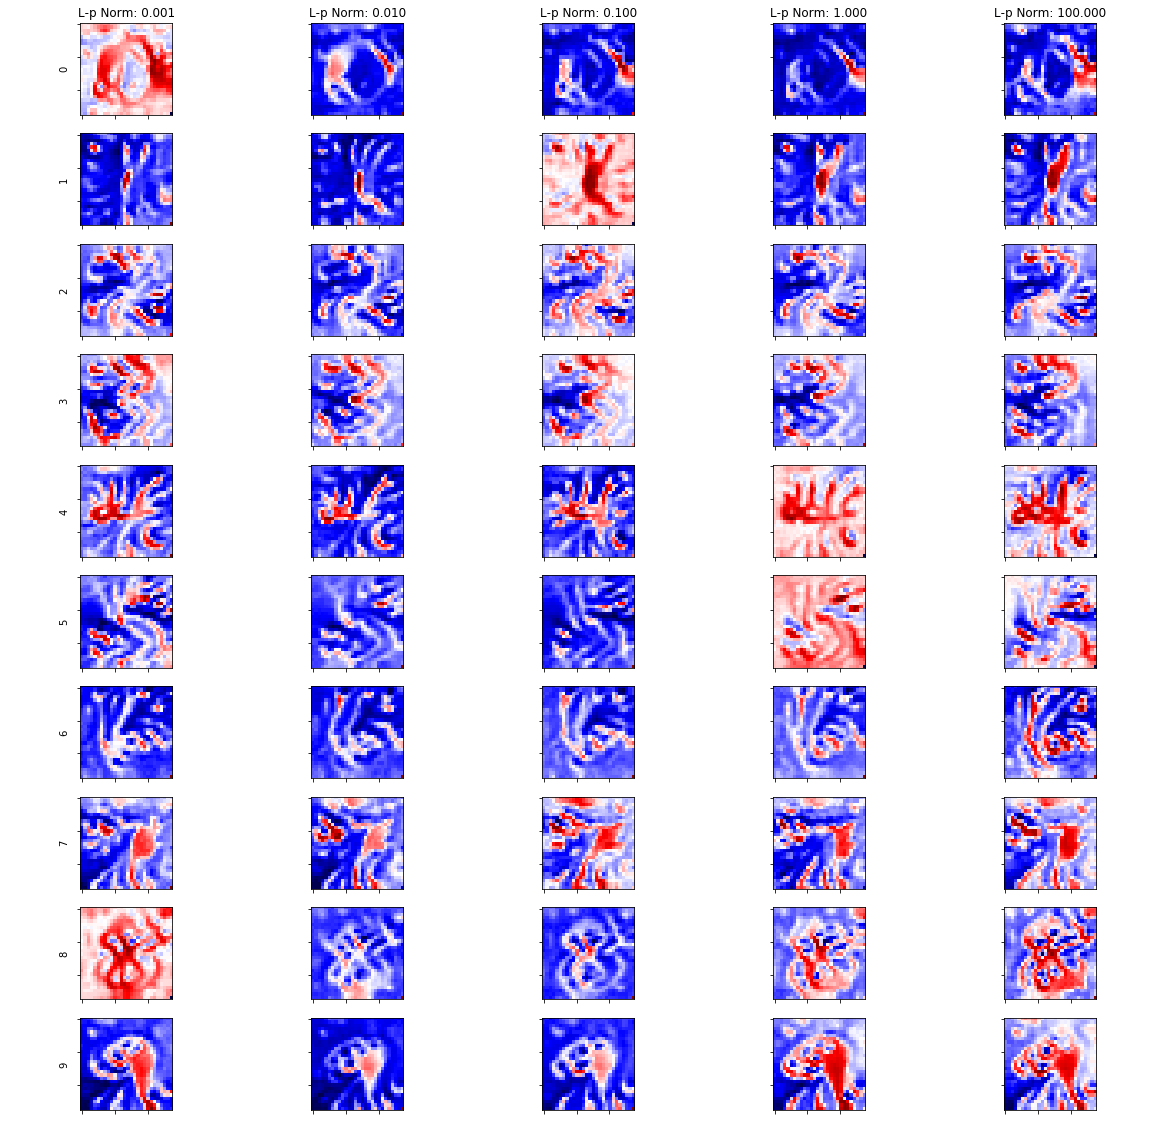

In [11]:
fig2 = plt.figure(figsize=(20, 20))
plt.grid(b=None)
plt.axis('off')
ax2 = []
lp = [1e-3, 1e-2, 1e-1, 1, 100]
j=0
for idx in range(10):
    for lp_i in range(len(lp)):
        ax2.append( fig2.add_subplot(10, 5, j+1) )
        img = visualize_activation(model, layer_idx, filter_indices=idx, input_range=(0., 1.), 
                                   tv_weight=10, lp_norm_weight=lp[lp_i])
        plt.imshow(img.squeeze(), cmap='seismic', interpolation='nearest')
        ax2[lp_i].set_title('L-p Norm: %.3f'%lp[lp_i])
        ax2[j].set_yticklabels([])
        ax2[j].set_xticklabels([])
        j+=1
    plt.setp(ax2[idx*5], ylabel=idx)

Podemos observar que a mudança de peso influencia positivamente em alguns numeros e negativamente em outros. Tentando generalizar e definir o peso que representa melhor todos os numeros. Foi escolhido o L-p norm = 100

Nessa etapa vamos apresentar todos os numeros com os pesos definidos

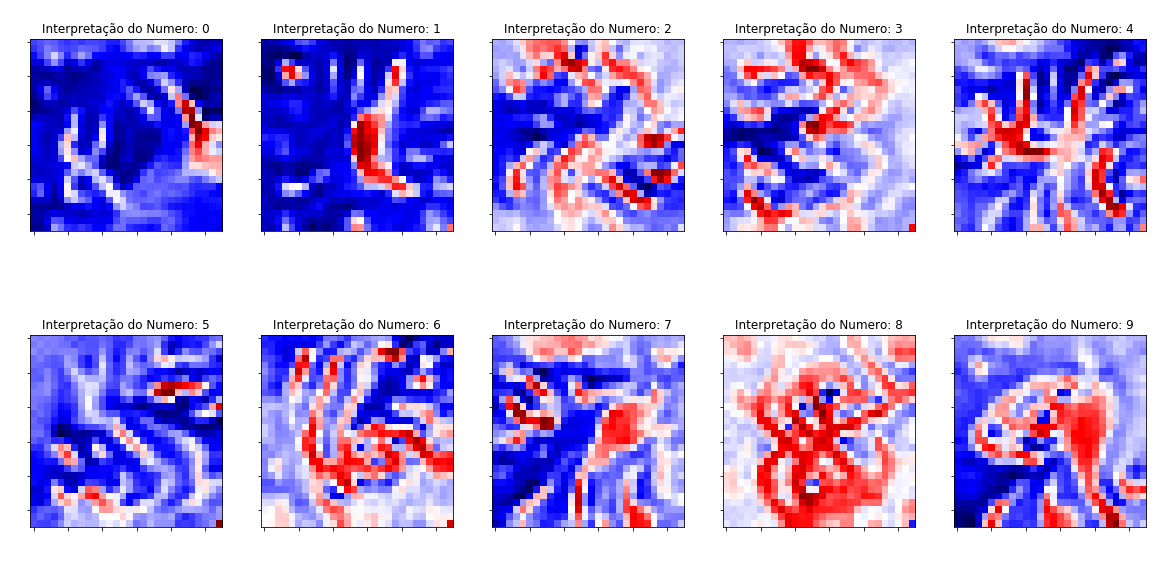

In [12]:
fig3 = plt.figure(figsize=(20, 10))
plt.grid(b=None)
plt.axis('off')
ax3 = []
for output_idx in range(10):
    ax3.append( fig3.add_subplot(2, 5, output_idx+1) )
    img = visualize_activation(model, layer_idx, filter_indices=output_idx, input_range=(0., 1.),
                              tv_weight=10, lp_norm_weight=100)
    
    plt.imshow(img.squeeze(), cmap='seismic', interpolation='nearest')
    ax3[output_idx].set_title('Interpretação do Numero: %i'%output_idx)
    ax3[output_idx].set_yticklabels([])
    ax3[output_idx].set_xticklabels([])

## Analisando os resultados da Questão 7b)

Acima podemos observar a interpretação da máquina para identificar cada número. É interessante observar como alguns números que geralmente são escritos de forma parecida, como 1, 7 e 9, possuem regiões em comum. Já comparando o que a máquina representa de significante ou não, números totalmente distintos como 3 e 4 dificilmente são confundidos.